In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
print(os.listdir("/kaggle/input/petfinder-adoption-prediction"))
print(os.listdir("/kaggle/input/petfinder-adoption-prediction/train"))

['train_images', 'state_labels.csv', 'BreedLabels.csv', 'train_sentiment', 'breed_labels.csv', 'train_metadata', 'train', 'ColorLabels.csv', 'test_images', 'PetFinder-ColorLabels.csv', 'color_labels.csv', 'test_metadata', 'PetFinder-BreedLabels.csv', 'StateLabels.csv', 'test', 'PetFinder-StateLabels.csv', 'test_sentiment']
['train.csv']


In [4]:
trainData = pd.read_csv('/kaggle/input/petfinder-adoption-prediction/train/train.csv')

In [5]:
trainData.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [6]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13736 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

4    4197
2    4037
3    3259
1    3090
0     410
Name: AdoptionSpeed, dtype: int64


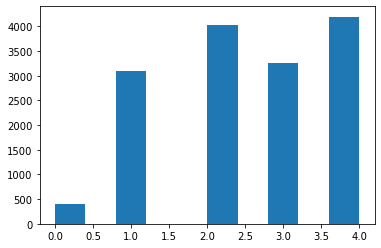

In [7]:
#Adoption speed
print(trainData['AdoptionSpeed'].value_counts())
trainData['AdoptionSpeed'].hist(grid = False)

In [8]:
# Type 1 = dog
# Type 2 = cat
trainData['Type'].value_counts()

1    8132
2    6861
Name: Type, dtype: int64

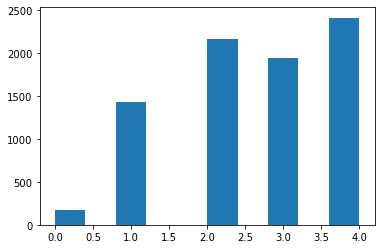

In [9]:
# Adoption speed for dogs
trainData[trainData['Type'] == 1]['AdoptionSpeed'].hist(grid=False);

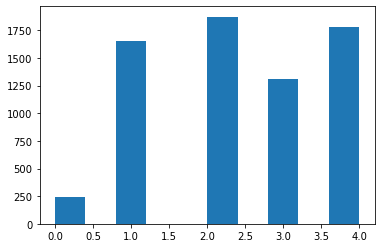

In [10]:
# Adoption speed for cats
trainData[trainData['Type'] == 2]['AdoptionSpeed'].hist(grid=False);

Adoption speed of 0 is very rare for both dogs and cats, but the other categories are close to each other.
Cats tend to get adopted earlier than dogs.

In [11]:
for w in trainData['Name']:
    print(w)

Nibble
No Name Yet
Brisco
Miko
Hunter
nan
BULAT
Siu Pak & Her 6 Puppies
nan
Kitty
Bear
Kali
Peanut
2 Mths Old Cute Kitties
Lost Dog
Max
Brownie
Blackie
Beauty
nan
Godiva
Tigers
Kenit, Kenot, Techit, Keyad, Owen
Donut
Cikenet
Garfield
No Name
No Name
Hunter
Pepper
Benji & Kimi
Kekok
BoiBoi
nan
Kitten Girl Girl
Tom
nan
Comel
WHISKY
Boy
Angel
Drax Aka Fatso, Quill & Rocket
Novy
Jack
Xiao Gou
Blackie & Spotty
Cimpuk
Lollipop
Cute Puppies
Alang
Blackie Duo
Cedric Jones
BouncerBoy: Beagle Mix
Mummies
Dusty
Kitties
Hitler (rename-able)
Skippy
Ceasar
Chocolate And Kitten
Puss In Boots
Lego
Milky
IO-Male-03
Little Yelpers
Ding Ding
nan
Bill & Ben
Almond
Jasz
QiQi
H3
Baby / Bubbles
Ollie
9 Puppies For Adoption!
Coco
Pebbles & Pepper
Zoe
Z3
nan
MPSP-F-01
Teddy
Tanto In Kulim
Cody
Malee
Mayo 2 Pups
Lulu
Rottweiler Puppy
Lion Dog In Training
Molly
Rocky 06
Kiki & Lala
nan
Si Kuning
Xiao Huang
HeiHei
Manja
Miko
Fei Chai
nan
nan
Sweetie Pie
Jasz Michael
C
Honey
Meelow
SYLVESTER
Doggie R4
nan
Pretzel


nan
Fat Puppies
Hermes
DogDog - URGENT ADOPTION
Samson
Momo
Lala
Kity & Mini
Mixed Pit Bull
Koharu
Coco, Caroline N The Kids
Peaches & Cream
Dylan
Min
Micky
Bunny
Scooter
Sunday
Mongrails For Adoption
nan
Cutie
nan
Happy
Rocky
Cute Puppies From DBKL
Mask
Marmalade
GLEE
Chemai
Fiona,Snow & Baby
Blessing Fr Above
Miss Johnny
Comot The White Cat
Kittens
Zander
Aboy
Pregnant Cat
Tigger
Elmo
Four Super Active Furbabies
Baru
Romeo
<:))))<    Mi   <:))))<
Ron Weasley & Harry Potter
Jim & Paul
nan
Dasch
Happy, Yippy, Bipy
Golden W
nan
Titto
Charlotte
BEAUTY
Momo
Teddy, Hero N Brownie
AB1
Orange
Cute Kittens
Lucky
Jackie
Pirate
Polka Dots
Smeagold
nan
Little Black Girl
Husky
More Kittens For Adoption~
Mattie
Peppermint
èèã
Coco & Molly
Park Girls
JY-M-02
ECRU
Puppy
Foxy
Little Baby
None
Tiger
Mix Breed
Furry
Vicky
Black & White Kittens
A Litter Of 10 Puppies
Abu
Ms Getto
Marble
Bambi
Blue Baby
Kiera
No Names Yet
Maya
Rescue Kittens For Adoption
Kitty 19
nan
Save Me Or I'll Die #6
Ace
Anni

Jolin
nan
Tabby Kitten 2
Reika Blossom
Snow
Rocky And The Bunch
Sassy
Dalmation Mix
Male Kitten For Adoption
Angel
Save ME Or I'll Die #47
Charcoal(Black) & Bambee(Grey)
MeeOW !
Pampkin
Mia
MiMi
Sassha
Bobby
Kingsley
3 Months Old Kitten
Nafa And Siblings
Dibbie
White Cute Poodle
Yoda 03
Juulie
Scott Moe & Ally Faye
Bitsy
Baby
Amber
Kelly
Cashew
Oreo
Lovely Affectionate Young Lady
nan
Oyen
Kitten Messi In Damansara!
Neslo
Nala
Gruff
Alley
Male_Puppy_7 Weeks Old
nan
Whoopi
nan
nan
Giggs
Monday Girl
Man @ Amanda
Kong Kong
Colleen McCollar
nan
Puppies For Adoption
Garlicc
MABEL
Seeta
Noah And Nellie
Grey Tabby P-Power Male
Amy
Renny
Terrier Mixied Female Dog
Felix
Fi Fi
One Eye Bobo
White With Black
White Orange Boy 1
Brown Brown
Female Puppy For Adoption
Xiao Hei
Mec
Jackie
Thunder
Aust Kelpie Mixed
Kitten
Dashy
Long Hair Cats For Free
Zorro
Buddy
SUNDAY THE CAT
Bella
Kimmy
nan
Brilliant
Baby
D252(030117) Guarddog
Klein
Puppies Looking For Good Homes
Silky
Meera
Pugsley
A (F)  B (M)
Doggi

Bon
Nona
Mimi
3 Puppies For Adoption
GOLDEN FATT CHOI KITTEN
Mommy & 2 Kittens
Daisy
Scooby's Big Brother And Sister
Gracy
Sweet Miko
nan
Tinkerbelle
Boy
HUA KAI FU GUI
Spike
Doberman
The Bucuk Bucuk Polka
2 Cute Kittens For Adoption
B1
3 Kittens
BEARRR
nan
Duzell
Tammy
Rocky & Rocky Zai
Daisy
Puppy
5
Milo
Padaiyappa
Da FU
T-Rex
Shepa
Hansen
Shwun
Vella
Branda
Europa
Missy & Lucy
Red
Fa
New Mom ( Re Nameable )
Zilla
Little Red Bean
Baby Bambi
Buddy
Mimi
Carly
Coco
Clover
nan
Wolf,batman,sally
Y5
Fat Boy
Mr. Handsome1
nan
Trained Pure Breed GSD + MKA Cert
Hug Hug
Caty
Sully
nan
Jacq
Coco
Abandoned Kitty
nan
M
Chuchoy
Sunny
Troy
Lion King
Miju
Snowy
Wei Wei
Powder Puff
Connie
Golden Retriever
nan
nan
Juling
SoloGirl
Sandy
Miso
6 Abandon Puppies From Wet Market
Huey
POPPY
nan
YEEZY (Need A Loving Owner)
Delta, Lambda, Epsilon And Sigma
Acang & Ulit
Cream Poodle
Pomeranian Mixed Poodle
Ben
Black
nan
Mayo
Milo
nan
Lei Lei
Shanyu
SOS ð Owner Leaving Msia
ABBA
nan
nan
Summer
Brownie
Hey B


Patches
Milo ç±³é²
Lady
Etot
nan
Amber
Puppy 1
Kittens Need Home
Brownie
Puppy Dog - Returned HOME! :)
Kitty
2 Month Old Kittens
P95(151016)
Qing- Qing
Kucing Ipoh Diberi Percuma
nan
Tam JR
4 Adorable Puppies
The Manja Mr CrankyPants
Thomas
Kolbi Boy
Py
Nicole
nan
Matt
Bambi
Doogie
Baby Kittens
Linsay
Rio-rio
Spot
Elsa
Truffle
Billy
Jerry
nan
MPSP-F-03
Oren
nan
nan
Yuki 02
Curly
Egg Tart
Kenit
Bella
nan
Oren & Friends
Batches
2 Lovely Healthy Kittens
Li Li
Looking For A Kitten
Sha Sha
Silver
Bumble B
Olio
Leia
Blacky ( Pitbull Mix )
Giant In Kulim
Nix
Puppy
Katty (video)
JS-M-101
Waiting New Owner To Name Me!
Mix Kitten
Dale
Alvin
Nikita
Sushi
Johnny
Alley Kitty
D117 (160415)
Cheepee & Munchee
Tiger Ninja
Grace
Othman
Bobo(abandoned Male Poodle/terrier)
Simi
Ah Boy/Sky
Domino (zorro-faced Meow)
Adorable Female Puppy !!
Doggie R24
nan
nan
Snowie
Frappucino
Ole-Ole & FiFa
- To Be Named -
Louise
Isabella
Saturday
Iris
Captain
Kitten For Adoption
Lalila
SUNNY
Local Mix Persian (Golden-ora

nan
Wei Wei
No Name
Tiger Girl
2 Abadoned Kittens
Angie
Sally Field
Mongrel Puppies
Wu Kong
Princess
Recks
251(081016)
ViVi
Shabu(Brown)
Wong Choy
Macy
Unnamed
Munchkin Miko
German Shepherd Mix Puppies
Mommo Family
Grey
Da May & Xiao May
City Kitten
Cute Kittens Of Varying Ages
Cutie In Kota Dsara
Sebastian
Harry
Miracle Five
Marble & Fruitcake
MiMi
Kimmie
Meow
Tomagochi
Kittens Available For Adoption
Earthy
Mochi
Pororo And The Gang
Mochi
nan
Ben
nan
Kak Ros
Manyaw
ROYY
Lei Lei
BaiBai
Looong Life Kitty
(No Name - She Is Just A Stray)
Mixcy Girl
Cookie
Browny's Pups
MOMOT
nan
Zety And Whity
Mac
Cute Siblings
Puppy
Scotch
nan
Along
Max Aka Brandy
Ingrid
Mimi
Veera
Favour Speedy Abundance And Courage
P
4 Kittens
Tank & Zorro (Urgent Adoption!)
Luna
Jelly Bean
Shanti
Junior
Girl Girl
Expresso
Dolly
Boy
Poodle
Mask
Maxine
Sky
Four Golden Flowers Sisters
Spunky
Lulu
nan
Tico
Ash
Cicik
Sultan
Double Quartets
Snowball
White Kittens
Mao Zai & B Zai
Cheetah
Grey
Lacey
Ena
Super Girl
!!!!
nan
Xa

Bonnie
Jaffe
Dota
Baby
Mike
Ruby
Roxy
Baby A.J. & Baby Choki
Panda
Arty
Flour
Tiger
Latte
Freedom
â¤ Esenia Love â¤
Sailor
Sky
Dog Found In Kota Damansara
Windy
Hosten
Sunny
Two Small Puppies
Yoyu
Rocky
Luna
Nuneng Dan Anak- Anak
Faye Malinois Mixed
Hope
Yellow
Tiger
Alisa
Karu
Oldiee
Jaka
Toto And Lan
Benji Boy
Moz The Golden Kitten
3 Tuxedos
BW2
Snowflake
Brownie
Coffee
Ebony
Boba, Socks And Joe
Meow
Ashcroft
Brune
Tuxie
Toby
Tasha
Lucy,Star,Shiro,Buncit,Jess,Macy
nan
Molly
Blackie
Snow
Kitty
8 Puppies
June
nan
Chanteq
The Three Amigos
Pishi
Free 2 Vaccinations
KC & JOJO NEED A HOME!!
New Kittens
Snowy
Boboy
Polo
Koocheng's 6 Kittens.
Doggy
Pirate
Pup 3 & Pup 4
Toni
Mum & 3 Kittens URGENTLY Need Home
Checkers
Stormy
Ha Ha (Toy Poodle)
Blue Kittens
Dobby
Brownie
Ginger & Cookie
Hope
Snowy
Chip & Dale
BULAT
Lala
Kyoto But Fr Siam @-@
Summer
Abandon Kitten
Mable
FREE KITTEN FOR ADOPT
Blackie
Whitey
Elfie
Maltese; Benny And Sherry
Polar Bear
Oyen N Stripe
Travel
Ping & Pang
Michelle (R

Clarissa
Tiger
Panda
Tammy
Whitey
Boots
Sharpie
Mojo Jojo
Darling
Bruce
Chou Ma Gay & Happy
nan
ð¸ð·ð Take Me PLEASE ð
Candy
Farrow
Luffy
Michi
Cash & Mac
Turi & Her Kittens
Bujji
Dora
Doggie
Ziggy And Marley
Buddy
5 Newborn Kittens Wants HOME
Bobo
Mama Siam
Nachoo
Puppies Looking For A Loving Home
Naughty, Sneaky & Playful
Full Black Kitten
Tomo
Eva
Snoopy
Hailey
Poppy
Mayo äºæ
Olynn
Wangwang
Trixcy
SUNKIST (smart, Loyal, Small Size)
Meow Meow
Rambo
Adult Smooth Coat Chihuahua Female
nan
Brownie
nan
Save ME OR I'll Die #42
Baby
Goodie
Telat & Belan
Tommy
Brownie 1
Gentle Heart
Mimi
Faith
Dolly
BB
Sleepyhead
Black Kitten Needs Home
Kittens
*Teddy*
Tux
Puppies For Adoption
Dex
Doggie R9
Daisy
nan
nan
Misty
Huts
White
Cuddle
Chiko & Chika
Bubu Bear
Wallis
Ollie
AH MIAO
Girl Girl
Pure Breed Shih Tzu - Max
Cody
Olga
Kitty 3
Millie & Milo
Mimi
Twinkle, Lucky And Gigi
Arthur
Tabitha
Wolf
Chokie
nan
nan
Kitten RA6
5 Adorable Kittens
Keanu
Oreo
Cute Pups
nan
Kittens (different Age

Bunny
Single Puppy Ipoh
Snow
Mr. Soft Ears
Toothless And Pury
Muewwy
Milo
FIDO, LUNA & MOLEX
Maksim
Kitten N Mummy
Shitzu
Leia
Shaggy
Money
Pacino
Whiteyy
Spot
Occhi Belli
URGENT: Frigga The Sweetest Girl
Gilda
Wa Wa
Yuan Yuan
Lab Mix 3
Puppy
Miyo
Kitten RA19
Panda
Peanut
Vanila
nan
Bowser
Chanel
Keeva
Kitty
nan
Kitten
Gomes
Des
Kaya Bun
Toto
Nameless
Baby
Bosko
Oreo
Dania
Phoebe
HeiHei
Silky Missing
Socks
Mini
Dak KunyiT
Abg Long
Blacky
5 New Born Puppies
Whisky
Jasmine
Olly
Nini
D144(030217)
Comot
Racer
Maddie
Boceyyy
Panbe
Manis
Belang
Doremon
Sentul Kittiens
Tommie
KL Puppies For Adoption
Omari
Kofi (annan)
Zee4
Ang Ang
Wormmy
Cici N Shelly
Kimchi
Ethio
SambaBoy
Bella
Patch
âªMami's Babies âª
Alger
nan
Terry
Pets + Strays : BlueEyed BlackWhite
Snowy
nan
Serato & Eddie
Monkies
Ms Daym
Fili


In [12]:
#Special names: 
#1) nan
#2) Multiple names: Siu Pak & Her 6 Puppies
#3) Generic names: 2 Mths Old Cute Kitties, Lost Dog, No Name, 9 Puppies For Adoption!, No Name Yet, Not Named, (No Name),[No Name], etc.
#4) Meaningless names: IO-Male-03, H3, Z3, DO RE MI, BB, Y1

In [13]:
for name in trainData[trainData['Name'].isna()]['Name']:
    print(name)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [14]:
names = []
for name in trainData['Name']:
    if 'name' in str(name).lower():
        names.append(str(name))
   
for name in names:
    print(name)
    
# No names:
# Lost Dog, No Name, 9 Puppies For Adoption!, No Name Yet, Not Named, (No Name),[No Name], $ To Be Named $, Noname, Unamed Yet 2, Unamed, Unnamed, No Names Yet, Not Named Yet,
# Unnamed 3 Kittens ( By Dani), No Name Kitten, Nameless, (no Name), Name Them & Love Them, Not Name Yet, No Names Yet, *No Name*, "no Name", (No Names Yet), * To Be Named *,
# Unnamed., NO NAME, Not Yet Name, No Name Kitties, Waiting For You To Give Him A Name, No Names Yet, *please Name Us*, Newborn *no Name, - To Be Named -, 
# No Name Yet, It's Up To The Owner, Name Them & Love Them 3, NO NAME YET, (No Name - She Is Just A Stray), Cream Cat (unnamed), (no Name), Wait For The Real Owner To Name It,
# 4 Kittens Open For Adoption (no Name), Need You Giving  A Name, No Name 2, UNNAMED, Unamed Yet, No Name Yet...., Kitten....no Name, Name Less Kitten, Haven't Named Them,
# No Name Yet (Must Neuter), Haven't Name Yet, Haven't Been Named, Not Yet Named

No Name Yet
No Name
No Name
Hitler (rename-able)
No Name
No Name
Not Yet Named
Name Them & Love Them 2
No Name
No Name Yet
No Name
No Name
Unnamed
Mocha &Latte (can Be Renamed)
Kuroki (NAME IS UP TO YOU)
Temporary Name: Ah Wong
No Names
(No Name)
1 Year Kitten Named Mia At Damansara!
No Name Yet
No Name
Mickey (can Be Rename Later)
My Name Is ??? Tiramisu
[No Name]
No Name Yet
Kuro Kuro (temporarily Name)
No Name Yet
No Name
No Names Yet
Noname
$ To Be Named $
Unnamed
In The Name Of Development
No Name
No Name Yet
No Name Yet
No Name Yet
Unamed Yet 2
The Nameless One
No Name
Unamed
Codename Spitzee
Unnamed
My Name Is Cocobee
Unnamed 3 Kittens ( By Dani)
No Names Yet
No Name
Not Named Yet
No Name
No Name
No Name Kitten
No Name
No Name Yet
Nameless
(no Name)
Name Them & Love Them
Nikki (temporary Name)
To Be Named By Owner
Not Name Yet
Not Named Yet
No Names Yet
Rocky OR Can Change Name
*No Name*
No Name
No Name
Not Named
Kitty (not Named Yet)
No Name Yet
"no Name"
No Name Yet
New Mom ( 

In [15]:
# Normalizing "nan" names to empty strings.
trainData.loc[trainData['Name'].isna(), 'Name'] = ""
print("Number of 'NaN' names: " + str(len(trainData[trainData['Name'] == ""])))

Number of 'NaN' names: 1257


In [16]:
# Normalizing different forms of "Unnamed"
unnamedForms = set(['Lost Dog', 'No Name', '9 Puppies For Adoption!', 'No Name Yet', 'Not Named', '(No Name)', '[No Name]', '$ To Be Named $', 'Noname', 'Unamed Yet 2',\
               'Unamed', 'Unnamed', 'No Names Yet', 'Not Named Yet', 'Unnamed 3 Kittens ( By Dani)', 'No Name Kitten', 'Nameless', '(no Name)', 'Name Them & Love Them', \
               'Not Name Yet', 'No Names Yet', '*No Name*', '"no Name"', '(No Names Yet)', '* To Be Named *', 'Unnamed.', 'NO NAME', 'Not Yet Name', 'No Name Kitties', \
               'Waiting For You To Give Him A Name', 'No Names Yet', '*please Name Us*', 'Newborn *no Name', '- To Be Named -', 'No Name Yet, It\'s Up To The Owner', \
               'Name Them & Love Them 3', 'NO NAME YET', '(No Name - She Is Just A Stray)', 'Cream Cat (unnamed)', '(no Name)', 'Wait For The Real Owner To Name It', \
               '4 Kittens Open For Adoption (no Name)', 'Need You Giving  A Name', 'No Name 2', 'UNNAMED', 'Unamed Yet', 'No Name Yet....', 'Kitten....no Name', \
               'Name Less Kitten', 'Haven\'t Named Them', 'No Name Yet (Must Neuter)', 'Haven\'t Name Yet', 'Haven\'t Been Named', 'Not Yet Named'])

trainData.loc[trainData['Name'].isin(unnamedForms), 'Name'] = ""
trainData[trainData['Name'].isin(unnamedForms)] = ""
print("Number of 'NaN' names: " + str(len(trainData[trainData['Name']==""])))
#print(trainData[trainData['Name'] == ""])

Number of 'NaN' names: 1400


In [17]:
# Removing names that are codes (no vowels or two characters or less)
codeNames = set()
for name in trainData['Name']:
    strName = str(name).lower()
    if len(strName) < 3 or ('a' not in strName and 'e' not in strName and 'i' not in strName and 'o' not in strName and 'u' not in strName and 'y' not in strName):
        codeNames.add(strName)
    
print("Found " + str(len(names)) + " code names")

trainData.loc[trainData['Name'].isin(codeNames), 'Name'] = ""
print("Number of 'NaN' names: " + str(len(trainData[trainData['Name']==""])))

Found 177 code names
Number of 'NaN' names: 1446


In [18]:
# Adding feature for length of name.
trainData['Name_Length'] = trainData['Name'].map(str).apply(len)
print(trainData['Name_Length'].value_counts())

5     2586
4     1972
6     1800
0     1446
7     1085
9      575
8      535
3      449
11     418
10     391
12     354
14     317
13     307
15     270
16     256
17     219
2      186
20     172
19     171
18     166
21     142
22     132
23     130
25     103
35      88
24      87
27      74
26      73
32      67
33      62
30      60
31      60
34      60
28      56
29      52
40      16
1       16
37      15
39       9
36       6
38       6
45       2
44       1
47       1
Name: Name_Length, dtype: int64


In [19]:
# Adoption speed breakdown percentage for unnamed pets
100*(trainData[trainData['Name'] == ""]["AdoptionSpeed"]).value_counts() / (len(trainData[trainData['Name'] == ""]))

4    34.301521
2    24.619640
1    21.991701
3    16.735823
0     2.351314
Name: AdoptionSpeed, dtype: float64

In [20]:
# Adoption speed breakdown percentage for named pets
100*(trainData[trainData['Name'] != ""]["AdoptionSpeed"]).value_counts() / (len(trainData[trainData['Name'] != ""]))

4    27.319702
2    27.172068
3    22.270613
1    20.462095
0     2.775522
Name: AdoptionSpeed, dtype: float64

In [21]:
# Unnamed pets tend to be unadopted for more than 100 days by 7%, in comparison with named pets.

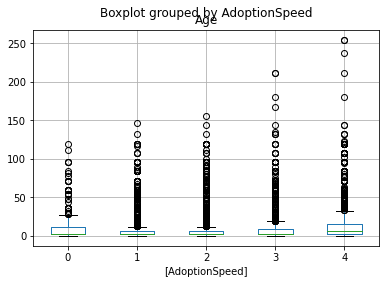

In [22]:
#trainData[["Age", "AdoptionSpeed"]].hist()
trainData.boxplot(column=['Age'], by=['AdoptionSpeed'])

In [23]:
trainData[trainData["AdoptionSpeed"] == 0]["Age"].value_counts()

2      115
1       54
3       44
12      33
4       24
6       20
24      16
0       10
18       8
36       8
5        7
7        7
60       6
9        5
72       4
10       4
14       4
8        4
11       3
96       3
17       3
28       2
15       2
13       2
48       2
54       2
30       2
112      1
16       1
19       1
84       1
22       1
23       1
26       1
27       1
29       1
32       1
44       1
82       1
53       1
120      1
78       1
21       1
Name: Age, dtype: int64

In [24]:
# Adding feature of Age in Years to group together pets with similar age.
trainData['Age_Years'] = trainData['Age'] // 12
trainData['Age_Years'].value_counts()

0     11244
1      1557
2       817
3       484
4       300
5       223
6       125
7       112
8        48
10       35
9        24
11        9
12        5
17        3
15        2
21        2
19        1
13        1
14        1
Name: Age_Years, dtype: int64

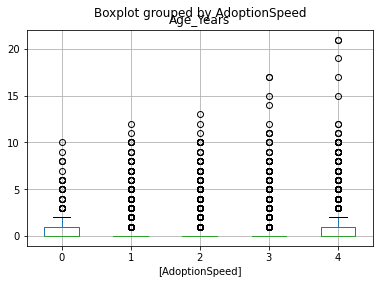

In [25]:
trainData.boxplot(column=['Age_Years'], by=['AdoptionSpeed'])

In [26]:
# It seems that younger pets are preferred: Pets adopted the same day are exclusively under 10 years old, while pets over 15 years old take more than 30
# days to get adopted.

In [27]:
# Breed Data
breedData = pd.read_csv('/kaggle/input/petfinder-adoption-prediction/breed_labels.csv')
breedData.head(10)

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita
5,6,1,Alaskan Malamute
6,7,1,American Bulldog
7,8,1,American Eskimo Dog
8,9,1,American Hairless Terrier
9,10,1,American Staffordshire Terrier


In [28]:
# Creating feature "IsPureBreed"
trainData['IsPureBreed'] = (trainData["Breed1"] == 0) | (trainData["Breed2"] == 0) | (trainData["Breed1"] == trainData["Breed2"])

4    29.762971
2    26.724770
3    21.080068
1    20.110776
0     2.321414
Name: AdoptionSpeed, dtype: float64


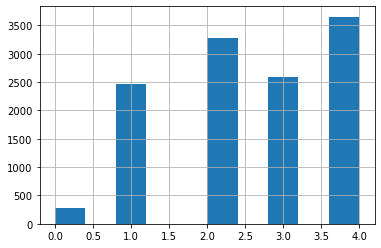

In [29]:
#100*(trainData[trainData['Name'] != ""]["AdoptionSpeed"]).value_counts() / (len(trainData[trainData['Name'] != ""]))
print(100*trainData[trainData['IsPureBreed']]["AdoptionSpeed"].value_counts() / (len(trainData[trainData['IsPureBreed']])))
trainData[trainData['IsPureBreed']]["AdoptionSpeed"].hist()

2    27.835052
3    24.705449
1    22.864507
4    19.992636
0     4.602356
Name: AdoptionSpeed, dtype: float64


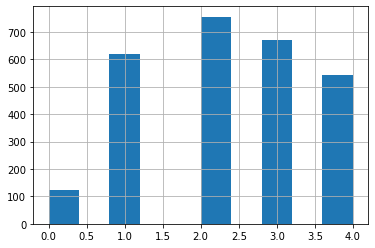

In [30]:
print(100*trainData[~trainData['IsPureBreed']]["AdoptionSpeed"].value_counts() / (len(trainData[~trainData['IsPureBreed']])))
trainData[~trainData['IsPureBreed']]["AdoptionSpeed"].hist()

In [31]:
# Interestingly, mixed breeds have better adoption rates for the same day, 
# and much better chances of getting adopted before 100 days (only 19% take more than 100 days, versus 29% for purebreeds)

In [32]:
#Health
trainData["Health"].value_counts()

1    14478
2      481
3       34
Name: Health, dtype: int64

4    27.711010
2    27.110098
3    21.757149
1    20.714187
0     2.707556
Name: AdoptionSpeed, dtype: float64


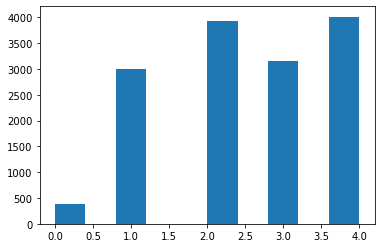

In [33]:
# Adoption speed for healthy animals
print(100*trainData[trainData['Health'] == 1]['AdoptionSpeed'].value_counts() / (len(trainData[trainData['Health'] == 1])))
trainData[trainData['Health'] == 1]['AdoptionSpeed'].hist(grid=False);

4    35.550936
2    22.037422
3    20.374220
1    18.503119
0     3.534304
Name: AdoptionSpeed, dtype: float64


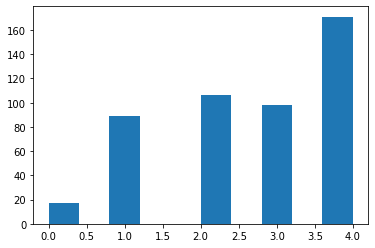

In [34]:
# Adoption speed for animals with minor injuries
print(100*trainData[trainData['Health'] == 2]['AdoptionSpeed'].value_counts() / (len(trainData[trainData['Health'] == 2])))
trainData[trainData['Health'] == 2]['AdoptionSpeed'].hist(grid=False);

4    41.176471
3    32.352941
2    17.647059
1     5.882353
0     2.941176
Name: AdoptionSpeed, dtype: float64


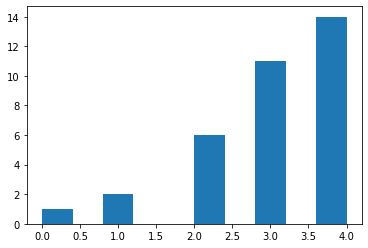

In [35]:
# Adoption speed for animals with serious injuries
print(100*trainData[trainData['Health'] == 3]['AdoptionSpeed'].value_counts() / (len(trainData[trainData['Health'] == 3])))
trainData[trainData['Health'] == 3]['AdoptionSpeed'].hist(grid=False)

In [36]:
# Healthy animals tend to get adopted more easily than animals with minor injuries and with series injuries. 
# In particular, 27% of healthy animals are not adopted within 100 days, while animals with minor injures have a rate of 35%, 
# and animals with serious injuries have a rate of 41% of not getting adopted after 100 days.

In [37]:
# Photo amount.
trainData["PhotoAmt"].value_counts()

1.0     3075
2.0     2518
3.0     2511
5.0     2147
4.0     1881
6.0      621
7.0      432
0.0      341
8.0      314
9.0      231
10.0     190
11.0     184
12.0      97
13.0      86
14.0      78
15.0      50
16.0      39
17.0      27
20.0      25
19.0      20
30.0      19
18.0      18
21.0      16
24.0      15
23.0      12
26.0      10
22.0       9
25.0       8
28.0       7
29.0       6
27.0       6
Name: PhotoAmt, dtype: int64

4    62.463343
2    10.557185
3     9.970674
1     9.970674
0     7.038123
Name: AdoptionSpeed, dtype: float64


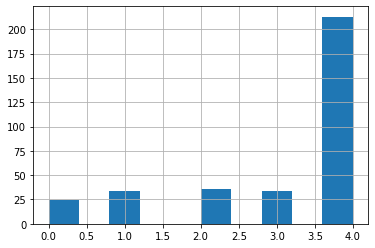

In [38]:
print(100*trainData[trainData['PhotoAmt'] == 0]['AdoptionSpeed'].value_counts() / (len(trainData[trainData['PhotoAmt'] == 0])))
trainData[trainData['PhotoAmt'] == 0]['AdoptionSpeed'].hist()

4    32.845528
2    25.463415
1    20.000000
3    19.252033
0     2.439024
Name: AdoptionSpeed, dtype: float64


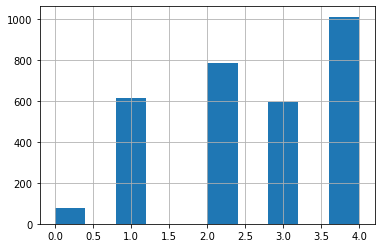

In [39]:
print(100*trainData[trainData['PhotoAmt'] == 1]['AdoptionSpeed'].value_counts() / (len(trainData[trainData['PhotoAmt'] == 1])))
trainData[trainData['PhotoAmt'] == 1]['AdoptionSpeed'].hist()

4    29.825258
2    26.409849
1    20.770453
3    19.698173
0     3.296267
Name: AdoptionSpeed, dtype: float64


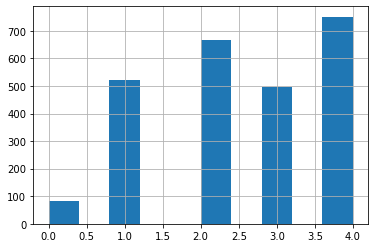

In [40]:
print(100*trainData[trainData['PhotoAmt'] == 2]['AdoptionSpeed'].value_counts() / (len(trainData[trainData['PhotoAmt'] == 2])))
trainData[trainData['PhotoAmt'] == 2]['AdoptionSpeed'].hist()

2    28.181919
4    24.539132
3    23.589800
1    21.172315
0     2.516834
Name: AdoptionSpeed, dtype: float64


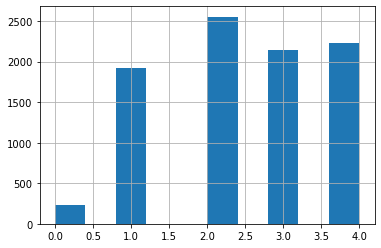

In [41]:
print(100*trainData[trainData['PhotoAmt'] > 2]['AdoptionSpeed'].value_counts() / (len(trainData[trainData['PhotoAmt'] > 2])))
trainData[trainData['PhotoAmt'] > 2]['AdoptionSpeed'].hist()

In [42]:
# The percentage of pets not adopted after 100 days for profiles with zero photos is 64%, while one or more photos seem to increase the chances of 
# being adopted earlier.

In [43]:
# Creating feature "HasPhoto"
trainData['HasPhoto'] = trainData["PhotoAmt"] > 0

In [44]:
# VideoAmt feature
trainData['VideoAmt'].value_counts()

0    14419
1      417
2       92
3       36
4       15
5        7
6        4
8        2
7        1
Name: VideoAmt, dtype: int64

In [45]:
# The VideoAmt category is very skewed to zero, as there rarely are any videos attahced to the profiles, so it's hard to make an inference with such a class imbalance.

In [46]:
# Quantity feature.
trainData['Quantity'].value_counts()

1     11565
2      1422
3       726
4       531
5       333
6       185
7        84
8        52
9        33
10       19
20       12
11       10
12        6
15        4
16        3
17        3
13        2
14        2
18        1
Name: Quantity, dtype: int64

In [47]:
# The Quantity category is also strongly skewed to profiles with one animal.


In [48]:
# Sentiment Analysis
# Create dataframe for Sentiment Analysis
import json

petIds = []
magnitudes = []
scores = []

for sentimentFilename in os.listdir("/kaggle/input/petfinder-adoption-prediction/train_sentiment"):
    with open("/kaggle/input/petfinder-adoption-prediction/train_sentiment/" + sentimentFilename, 'r') as f:
        jsonContent = json.loads(f.read())
        magnitude = jsonContent['documentSentiment']['magnitude']
        score = jsonContent['documentSentiment']['score']
        petIds.append(sentimentFilename.split('.')[0])
        magnitudes.append(float(magnitude))
        scores.append(float(score))

In [49]:
rows = []
for i in range(len(petIds)):
    rows.append([petIds[i], magnitudes[i], scores[i]])
columns = ['PetID', 'SentimentMagnitude', 'SentimentScore']

sentimentDf=pd.DataFrame(rows)
sentimentDf.columns = columns

sentimentDf.head(10)

,PetID,SentimentMagnitude,SentimentScore
0,5eeb10b7a,1.5,0.1
1,dabcf0e55,1.6,0.0
2,6469a2a4a,16.1,0.2
3,d440e9ebf,1.8,0.0
4,87bdcbcdd,3.0,0.7
5,123f15578,0.7,-0.2
6,3c6f9a4e7,2.0,0.1
7,8705145ca,2.4,0.0
8,d99ea593a,5.8,0.4
9,0cf645af3,3.1,0.5


In [50]:
trainDataWithSentiment = pd.merge(trainData, sentimentDf, on='PetID')
trainDataWithSentiment.head(100)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Description,PetID,PhotoAmt,AdoptionSpeed,Name_Length,Age_Years,IsPureBreed,HasPhoto,SentimentMagnitude,SentimentScore
0,2,Nibble,3,299,0,1,1,7,0,1,...,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1,2,6,0,True,True,2.4,0.3
1,2,,1,265,0,1,1,2,0,2,...,I just found it alone yesterday near my apartm...,6296e909a,2,0,0,0,True,True,0.7,-0.2
2,1,Brisco,1,307,0,1,2,7,0,2,...,Their pregnant mother was dumped by her irresp...,3422e4906,7,3,6,0,True,True,3.7,0.2
3,1,Miko,4,307,0,2,1,2,0,2,...,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8,2,4,0,True,True,0.9,0.9
4,1,Hunter,1,307,0,1,1,0,0,2,...,This handsome yet cute boy is up for adoption....,850a43f90,3,2,6,0,True,True,3.7,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,,1,264,0,3,5,6,0,1,...,These kittens were found in neighbourhood. Ple...,49bb70e36,1,2,0,0,True,True,1.4,0.1
96,1,Sweetie Pie,24,119,307,2,1,6,7,2,...,Sweetie was rescued in Jan 08. The rescuer has...,43ddb2eb4,2,2,11,2,False,True,3.4,0.4
97,1,Jasz Michael,60,195,0,1,6,0,0,2,...,Looking for a temporary foster home from Septe...,dae92dd61,3,4,12,5,True,True,2.4,0.6
98,1,C,1,307,307,2,1,2,7,2,...,For Adoption,a6ac8884b,1,3,1,0,True,True,0.0,0.0


In [51]:
# Sentiment Analysis
trainDataWithSentiment['SentimentScore'].value_counts()

 0.0    2328
 0.3    2177
 0.2    2168
 0.1    1966
 0.4    1598
 0.5    1164
 0.6     717
 0.9     634
 0.8     508
 0.7     466
-0.1     295
-0.2     167
-0.3     102
-0.4      43
-0.5      35
-0.6      28
-0.7      22
-0.8      16
-0.9       8
Name: SentimentScore, dtype: int64

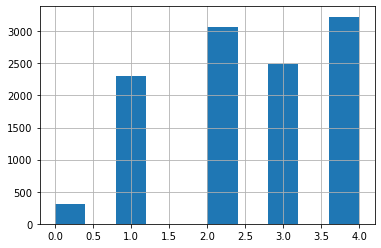

In [52]:
#print(100*trainDataWithSentiment[trainDataWithSentiment['SentimentScore'] > 0]['AdoptionSpeed'].value_counts() / (len(trainDataWithSentiment[trainDataWithSentiment['SentimentScore'] > 0])))
#trainData[trainDataWithSentiment['SentimentScore'] > 0]['AdoptionSpeed'].hist()
trainDataWithSentiment[trainDataWithSentiment['SentimentScore'] > 0]['AdoptionSpeed'].hist()

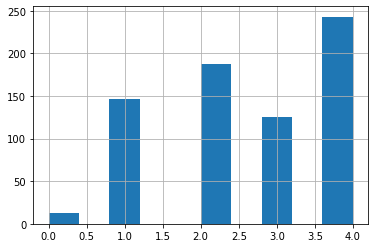

In [53]:
trainDataWithSentiment[trainDataWithSentiment['SentimentScore'] < 0]['AdoptionSpeed'].hist()

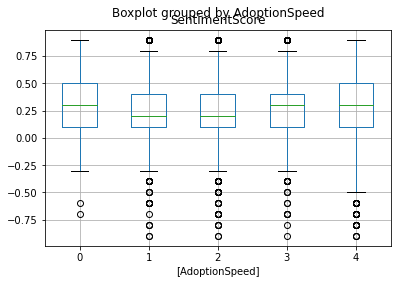

In [54]:
trainDataWithSentiment.boxplot(column=['SentimentScore'], by=['AdoptionSpeed'])

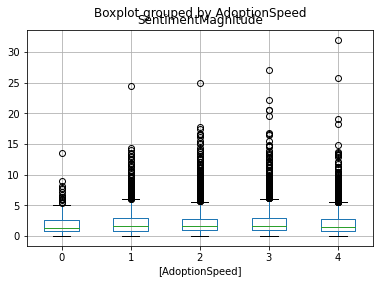

In [55]:
trainDataWithSentiment.boxplot(column=['SentimentMagnitude'], by=['AdoptionSpeed'])

In [56]:
trainDataWithSentiment['SentimentMultiplier'] = trainDataWithSentiment['SentimentScore'] * trainDataWithSentiment['SentimentMagnitude']

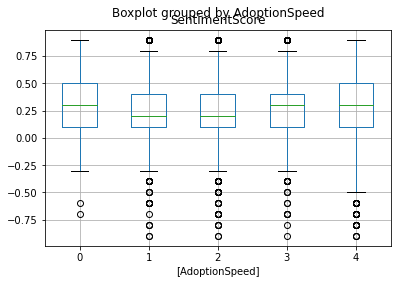

In [57]:
trainDataWithSentiment.boxplot(column=['SentimentScore'], by=['AdoptionSpeed'])

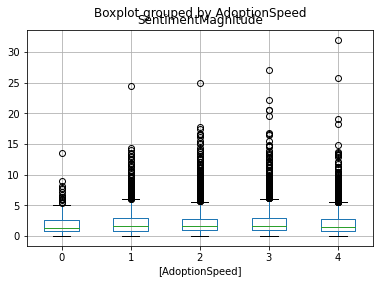

In [58]:
trainDataWithSentiment.boxplot(column=['SentimentMagnitude'], by=['AdoptionSpeed'])

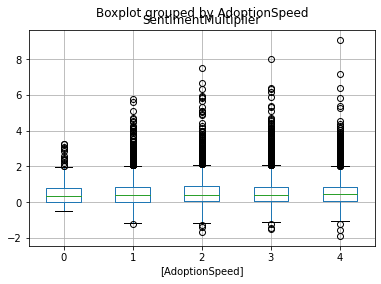

In [59]:
trainDataWithSentiment.boxplot(column=['SentimentMultiplier'], by=['AdoptionSpeed'])

In [60]:
# As the sentiment score becomes more negative adoption takes longer or becomes more unlikely.
# Larger sentiment magnitudes also results in the pets taking longer to be adopted.
# As the sentimient multipliers (score * magnitude) become more extreme (positively or negatively) the pet will take longer to get adopted.

In [61]:
# Adding DescriptionLength
trainDataWithSentiment['DescriptionLength'] = trainDataWithSentiment['Description'].map(str).apply(len)
print(trainDataWithSentiment['DescriptionLength'].value_counts())

12      206
14       75
122      65
16       62
88       56
       ... 
1147      1
1131      1
1107      1
1083      1
2023      1
Name: DescriptionLength, Length: 1469, dtype: int64


In [62]:
# Adding IsSinglePet
trainDataWithSentiment['IsSinglePet'] = trainDataWithSentiment['Quantity'] == 1
print(trainDataWithSentiment['IsSinglePet'].value_counts())

True     11199
False     3243
Name: IsSinglePet, dtype: int64


In [63]:
# Adding IsFree
trainDataWithSentiment['IsFree'] = trainDataWithSentiment['Fee'] == 0
print(trainDataWithSentiment['IsFree'].value_counts())

True     12205
False     2237
Name: IsFree, dtype: int64


In [64]:
# Adding HasVideo
trainDataWithSentiment['HasVideo'] = trainDataWithSentiment['VideoAmt'] > 0
print(trainDataWithSentiment['HasVideo'].value_counts())

False    13879
True       563
Name: HasVideo, dtype: int64


In [65]:
# Building a model

#trainColumns = ['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Health', 'PhotoAmt', 'SentimentScore', 'SentimentMagnitude', \
#            'Name_Length', 'Age_Years', 'IsPureBreed', 'HasPhoto', 'SentimentMultiplier', 'AdoptionSpeed']

#trainColumns_lgb = ['Type', 'Age', 'Breed1', 'Breed2', 'Health', 'PhotoAmt', 'SentimentScore', 'SentimentMagnitude', \
#                    'Name_Length', 'Age_Years', 'IsPureBreed', 'HasPhoto', 'SentimentMultiplier', 'AdoptionSpeed']


trainColumns_lgb = ['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2', \
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', \
       'Sterilized', 'Health', 'Fee', 'SentimentScore', 'SentimentMagnitude', \
       'Name_Length', 'Age_Years', 'IsPureBreed', 'HasPhoto', 'SentimentMultiplier', \
       'PhotoAmt', 'DescriptionLength', 'Quantity', 'IsSinglePet', 'IsFree', 'VideoAmt', 'HasVideo', 'AdoptionSpeed']

#trainColumns_lgb = ['Type', 'Age', 'Breed1', 'Breed2', 'Health', 'SentimentScore', 'SentimentMagnitude', \
#       'Name_Length', 'Age_Years', 'IsPureBreed', 'HasPhoto', 'SentimentMultiplier', \
#       'PhotoAmt', 'AdoptionSpeed']


#lgb_categorical_features = ['Type', 'Breed1', 'Breed2', 'Health']

lgb_categorical_features = ['Type', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2', 'Color3', 'Health', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', \
                           'Sterilized']

lgb_bool_features = ['HasPhoto', 'IsSinglePet', 'IsFree', 'IsPureBreed', 'HasVideo']


#lgb_categorical_features = ['Type', 'Breed1', 'Breed2', 'Health', 'HasPhoto']

#lgb_numerical_features = ['Age', 'PhotoAmt', 'Age_Years']
lgb_numerical_features = ['Age', 'PhotoAmt', 'Age_Years', 'Fee', 'SentimentScore', 'SentimentMagnitude', 'Name_Length', 'SentimentMultiplier', \
                          'DescriptionLength', 'Quantity', 'VideoAmt']
#lgb_numerical_features = ['Age', 'PhotoAmt', 'Age_Years', 'SentimentScore', 'SentimentMagnitude', 'Name_Length', 'SentimentMultiplier']

# Type, Name, Age, Breed1, Breed2, Health, PhotoAmt, Age_Years

X_train_lgb = trainDataWithSentiment[trainColumns_lgb].copy()
# Change this
X_test_lgb = X_train_lgb.copy()

In [66]:
def train_models(X_train, X_test, categorical_features, numerical_features, bool_features):
    
    import lightgbm as lgb

    params = {#'num_leaves': 512,
         'num_leaves' : 32,
         'objective': 'multiclass',
         'max_depth': -1,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 3,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "random_state": 42,          
         "verbosity": -1,
         "num_class": 5}

    # Additional parameters:
    early_stop = 500
    verbose_eval = 100
    num_rounds = 10000
    #n_splits = 5
    n_splits = 6
    
    from sklearn.model_selection import StratifiedKFold
    
    #kfold = StratifiedKFold(n_splits=n_splits)
    kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=15)

    #oof_train = np.zeros((X_train.shape[0]))
    #oof_test = np.zeros((X_test.shape[0], n_splits))

    i = 0
    val_qwks = []

    # Encode Label
    from sklearn.preprocessing import LabelEncoder

    label_encoder = LabelEncoder()
    #trainData.loc[trainData['Name'].isin(unnamedForms), 'Name'] = ""
    #X_train.loc[:, 'AdoptionSpeed'] = label_encoder.fit_transform(X_train['AdoptionSpeed'])
    #X_train['AdoptionSpeed'] = label_encoder.fit_transform(X_train['AdoptionSpeed'])
    X_train['AdoptionSpeed'] = label_encoder.fit_transform(X_train['AdoptionSpeed'])
    
    # Transform features into categorical.
    for c in categorical_features:
        #X_train[c] = X_train[c].astype('category')
        X_train[c] = X_train[c].astype('int')
        
    # Transform features into float.
    for c in numerical_features:
        X_train[c] = X_train[c].astype('float')
        
    # Transform features into bool.
    for c in bool_features:
        X_train[c] = X_train[c].astype('bool')
    
    for train_index, valid_index in kfold.split(X_train, X_train['AdoptionSpeed'].values):
    
        X_tr = X_train.iloc[train_index, :]
        X_val = X_train.iloc[valid_index, :]
    
        y_tr = X_tr['AdoptionSpeed'].values
        X_tr = X_tr.drop(['AdoptionSpeed'], axis=1)
    
        y_val = X_val['AdoptionSpeed'].values
        X_val = X_val.drop(['AdoptionSpeed'], axis=1)
    
        #print('\ny_tr distribution: {}'.format(Counter(y_tr)))
    
        d_train = lgb.Dataset(X_tr, label=y_tr)
        d_valid = lgb.Dataset(X_val, label=y_val)
        watchlist = [d_train, d_valid]
    
        print('training XGBoost:')
        # Predict using xgboost
        import xgboost as xgb
        xgb_model = xgb.XGBRegressor(booster = "gbtree", objective = "multi:softprob", num_class = 5, eval_metric = "mlogloss")
        xgb_model.fit(X_tr, y_tr)
        xgb_val_pred = xgb_model.predict(X_val)
        
        xgb_rounded_val_preds = []
        
        for pred in xgb_val_pred:
            xgb_rounded_val_preds.append(np.argmax(pred))
        
        print('training Random Forest:')
        # Predict using Random Forest
        from sklearn.ensemble import RandomForestClassifier
        randomForest = RandomForestClassifier(n_estimators=100, n_jobs=2, random_state=1357)
        randomForest.fit(X_tr, y_tr)
        
        randomForest_val_pred = randomForest.predict(X_val)
        
        randomForest_rounded_val_preds = []
        
        for pred in randomForest_val_pred:
            randomForest_rounded_val_preds.append(pred)
            
        print('training LGB')
        # Predict using LGB
        lgbModel = lgb.train(params,
                      train_set=d_train,
                      num_boost_round=num_rounds,
                      valid_sets=watchlist,
                      verbose_eval=verbose_eval,
                      early_stopping_rounds=early_stop)
        
        lgb_val_pred = lgbModel.predict(X_val, num_iteration=lgbModel.best_iteration)
        
        lgb_rounded_val_preds = []
        
        for pred in lgb_val_pred:
            lgb_rounded_val_preds.append(np.argmax(pred))
        
        
        
        from sklearn.tree import DecisionTreeClassifier
        print('training Decision Trees')
        decisionTree = DecisionTreeClassifier()
        decisionTree.fit(X_tr, y_tr)
        
        decisionTree_val_pred = decisionTree.predict(X_val)
        
        decisionTree_rounded_val_preds = []
        
        for pred in decisionTree_val_pred:
            decisionTree_rounded_val_preds.append(pred)
        
        
        from sklearn.naive_bayes import GaussianNB
        print('training Naive Bayes Classifier')
        naiveBayes = GaussianNB()
        naiveBayes.fit(X_tr, y_tr)
        
        naiveBayes_val_pred = naiveBayes.predict(X_val)
        
        naiveBayes_rounded_val_preds = []
        
        for pred in naiveBayes_val_pred:
            naiveBayes_rounded_val_preds.append(pred)
        
        
        #from sklearn import svm
        #print('training SVM')
        #linearSVM = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_tr, y_tr)
        
        #linearSVM_val_pred = linearSVM.predict(X_val)
        
        #linearSVM_rounded_val_preds = []
        
        #for pred in linearSVM_val_pred:
        #    linearSVM_rounded_val_preds.append(pred)
        
        #test_pred = model.predict(X_test, num_iteration=model.best_iteration)
        #val_pred = model.predict(X_val)

        #xgb_d_train = xgb.DMatrix(data=X_tr, label=y_tr, feature_names=X_tr.columns)
        #xgb_d_valid = xgb.DMatrix(data=X_val, label=y_val, feature_names=X_val.columns)
        #model = xgb.train(dtrain=xgb_d_train, num_boost_round=num_rounds, evals=watchlist, early_stopping_rounds=early_stop, verbose_eval=verbose_eval, params=params)
        #model = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)
        #model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.85)
        #xgb_model = xgb.XGBRegressor(booster = "gbtree", objective = "multi:softprob", num_class = 5, eval_metric = "mlogloss")
        #booster = "gbtree", objective = "multi:softprob", num_class = 3, eval_metric = "mlogloss"
        #xgb_model.fit(X_tr, y_tr)
    
        #val_pred = model.predict(X_val, num_iteration=model.best_iteration)
        #test_pred = model.predict(X_test, num_iteration=model.best_iteration)
        #val_pred = model.predict(X_val)
    
        #oof_train[valid_index] = val_pred
        #oof_test[:, i] = test_pred
        
        # Merging all predictions.
        val_pred = []
        
        for pred in xgb_rounded_val_preds:
            val_pred.append([pred])
            
        for i in range(len(val_pred)):
            val_pred[i].append(randomForest_rounded_val_preds[i])
            
        for i in range(len(val_pred)):
            val_pred[i].append(lgb_rounded_val_preds[i])
            
        for i in range(len(val_pred)):
            val_pred[i].append(decisionTree_rounded_val_preds[i])
            
        for i in range(len(val_pred)):
            val_pred[i].append(naiveBayes_rounded_val_preds[i])
            
            
        #for i in range(len(val_pred)):
        #    val_pred[i].append(linearSVM_rounded_val_preds[i])
        
        # Computing  QWK
        from sklearn.metrics import cohen_kappa_score, confusion_matrix

        #lgb_train_preds = lgb_model.predict(X_train_lgb, num_iteration=lgb_model.best_iteration)
        #train_actuals = X_train_lgb['AdoptionSpeed'].values

        #print("y_val: " + str(y_val[:5]))
        #print("val_pred: " + str(val_pred[:5]))
        rounded_val_preds = []
        
        #for pred in val_pred:
        #    minDiff = pred
        #    minClass = 0
        #    for c in range(5):
        #        if abs(c - pred) < minDiff:
        #            minDiff = abs(c - pred)
        #            minClass = c
        #    rounded_val_preds.append(minClass)
        
        for pred in val_pred:
            rounded_val_preds.append(np.bincount(pred).argmax())
        
        print("rounded_val_pred: " + str(rounded_val_preds[:5]))
        qwk = cohen_kappa_score(y_val, rounded_val_preds, weights="quadratic")
        val_qwks.append(qwk)
        print("QWK score: " + str(qwk))
    
        i += 1
    print("Average Validation QWK: " + str(np.mean(val_qwks)))
    
    # Return the latest trained k-fold, perhaps we want to train on the entire data or return the one with the best validation score.
    return [xgb_model, randomForest, decisionTree, naiveBayes, lgbModel]

In [67]:
models = train_models(X_train_lgb, X_test_lgb, lgb_categorical_features, lgb_numerical_features, lgb_bool_features)

training XGBoost:
training Random Forest:
training LGB
Training until validation scores don't improve for 500 rounds
[100]	training's multi_logloss: 1.33836	valid_1's multi_logloss: 1.38631
[200]	training's multi_logloss: 1.27113	valid_1's multi_logloss: 1.3577
[300]	training's multi_logloss: 1.22154	valid_1's multi_logloss: 1.34448
[400]	training's multi_logloss: 1.18147	valid_1's multi_logloss: 1.33829
[500]	training's multi_logloss: 1.14686	valid_1's multi_logloss: 1.3338
[600]	training's multi_logloss: 1.1157	valid_1's multi_logloss: 1.33099
[700]	training's multi_logloss: 1.0874	valid_1's multi_logloss: 1.32962
[800]	training's multi_logloss: 1.06192	valid_1's multi_logloss: 1.32893
[900]	training's multi_logloss: 1.03723	valid_1's multi_logloss: 1.3288
[1000]	training's multi_logloss: 1.01402	valid_1's multi_logloss: 1.32929
[1100]	training's multi_logloss: 0.9919	valid_1's multi_logloss: 1.32977
[1200]	training's multi_logloss: 0.970856	valid_1's multi_logloss: 1.33105
[1300]	tr

training Decision Trees
training Naive Bayes Classifier
rounded_val_pred: [2, 1, 4, 3, 3]
QWK score: 0.3719655914256913
Average Validation QWK: 0.367147433579478


In [68]:
xgb_model = models[0]
randomForest = models[1]
decisionTree = models[2]
naiveBayes = models[3]
lgbModel = models[4]

In [69]:
# Save the models as a Pickle files.
import joblib

#os.makedirs("outputs", exist_ok=True)
#joblib.dump(value=xgb_model, filename="outputs/xgb.pkl")

#os.makedirs("outputs", exist_ok=True)
#joblib.dump(value=randomForest, filename="outputs/randomForest.pkl")

#os.makedirs("outputs", exist_ok=True)
#joblib.dump(value=decisionTree, filename="outputs/decisionTree.pkl")

#os.makedirs("outputs", exist_ok=True)
#joblib.dump(value=naiveBayes, filename="outputs/naiveBayes.pkl")

#os.makedirs("outputs", exist_ok=True)
#joblib.dump(value=lgbModel, filename="outputs/lgbModel.pkl")

In [70]:
import lightgbm

print(joblib.__version__)
print(lightgbm.__version__)

import sys
print(sys.version)

import pandas
print(pandas.__version__)

import numpy
print(numpy.__version__)

import xgboost
print(xgboost.__version__)

0.14.1
2.3.1
3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) 
[GCC 7.3.0]
1.0.3
1.18.5
1.1.1


In [71]:
# Test predictions on fresh data
testData = pd.read_csv('/kaggle/input/petfinder-adoption-prediction/test/test.csv')
#lgb_test_pred = lgbModel.predict(X_val, num_iteration=lgbModel.best_iteration)


In [72]:
# Add Sentiment feature
# Sentiment Analysis
# Create dataframe for Sentiment Analysis

petIds = []
magnitudes = []
scores = []

for sentimentFilename in os.listdir("/kaggle/input/petfinder-adoption-prediction/test_sentiment"):
    with open("/kaggle/input/petfinder-adoption-prediction/test_sentiment/" + sentimentFilename, 'r') as f:
        jsonContent = json.loads(f.read())
        magnitude = jsonContent['documentSentiment']['magnitude']
        score = jsonContent['documentSentiment']['score']
        petIds.append(sentimentFilename.split('.')[0])
        magnitudes.append(float(magnitude))
        scores.append(float(score))
        
rows = []
for i in range(len(petIds)):
    rows.append([petIds[i], magnitudes[i], scores[i]])
columns = ['PetID', 'SentimentMagnitude', 'SentimentScore']

testSentimentDf=pd.DataFrame(rows)
testSentimentDf.columns = columns

testSentimentDf.head(10)

,PetID,SentimentMagnitude,SentimentScore
0,98ff9bd18,2.4,0.3
1,c55c30d11,2.3,0.5
2,471d0c9dd,2.5,0.2
3,9cef5fa38,1.1,0.1
4,2a1ed8912,2.0,0.3
5,b3dd7cbf3,0.5,0.2
6,1aed4a8fc,2.7,-0.3
7,e3b178375,2.3,0.7
8,e954193d6,2.1,0.3
9,3fd570f18,0.2,0.2


In [73]:
testDataWithSentiment = pd.merge(testData, testSentimentDf, on='PetID')
testDataWithSentiment.head(100)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,SentimentMagnitude,SentimentScore
0,2,Dopey & Grey,8,266,266,1,2,6,7,1,...,2,0,41326,2ece3b2573dcdcebd774e635dca15fd9,0,"Dopey Age: 8mths old Male One half of a pair, ...",e2dfc2935,2.0,5.2,0.7
1,2,Chi Chi,36,285,264,2,1,4,7,2,...,1,0,41326,2ece3b2573dcdcebd774e635dca15fd9,0,"Please note that Chichi has been neutered, the...",f153b465f,1.0,3.3,0.1
2,2,Sticky,2,265,0,1,6,7,0,2,...,1,200,41326,e59c106e9912fa30c898976278c2e834,0,"Sticky, named such because of his tendency to ...",3c90f3f54,4.0,2.8,0.1
3,1,Dannie & Kass [In Penang],12,307,0,2,2,5,0,2,...,2,0,41326,e59c106e9912fa30c898976278c2e834,0,Dannie and Kass are mother and daughter. We en...,e02abc8a3,5.0,6.0,0.4
4,2,Cuddles,12,265,0,1,2,3,7,2,...,1,0,41326,e59c106e9912fa30c898976278c2e834,0,"Extremely cuddly cat, hence the origin of his ...",09f0df7d1,5.0,2.2,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,R2C2 Sunrise,42,265,0,2,1,2,7,2,...,1,50,41326,62a25cadb85658be5275bd54a3b8c76d,0,I am a very sweet but shy little girly! Please...,8a9175cc8,2.0,0.7,0.3
96,1,D231(201215),32,307,0,2,1,7,0,2,...,1,80,41326,62a25cadb85658be5275bd54a3b8c76d,0,"Please contact us to adopt this pet, or visit ...",c31668c91,1.0,0.1,0.1
97,1,D58(271112),14,307,0,2,1,2,0,3,...,1,50,41326,62a25cadb85658be5275bd54a3b8c76d,0,"Please contact us to adopt this pet, or visit ...",f4f92a25f,3.0,0.5,0.5
98,2,R1C4 Celine,31,266,0,2,1,5,7,2,...,1,30,41326,62a25cadb85658be5275bd54a3b8c76d,0,"Please contact us to adopt this pet, or visit ...",51a68f921,2.0,0.5,0.5


In [74]:
def prepareDataset(df):
    
    # Clean up the 'Name' column.
    df.loc[df['Name'].isna(), 'Name'] = ""
    
    unnamedForms = set(['Lost Dog', 'No Name', '9 Puppies For Adoption!', 'No Name Yet', 'Not Named', '(No Name)', '[No Name]', '$ To Be Named $', 'Noname', 'Unamed Yet 2',\
               'Unamed', 'Unnamed', 'No Names Yet', 'Not Named Yet', 'Unnamed 3 Kittens ( By Dani)', 'No Name Kitten', 'Nameless', '(no Name)', 'Name Them & Love Them', \
               'Not Name Yet', 'No Names Yet', '*No Name*', '"no Name"', '(No Names Yet)', '* To Be Named *', 'Unnamed.', 'NO NAME', 'Not Yet Name', 'No Name Kitties', \
               'Waiting For You To Give Him A Name', 'No Names Yet', '*please Name Us*', 'Newborn *no Name', '- To Be Named -', 'No Name Yet, It\'s Up To The Owner', \
               'Name Them & Love Them 3', 'NO NAME YET', '(No Name - She Is Just A Stray)', 'Cream Cat (unnamed)', '(no Name)', 'Wait For The Real Owner To Name It', \
               '4 Kittens Open For Adoption (no Name)', 'Need You Giving  A Name', 'No Name 2', 'UNNAMED', 'Unamed Yet', 'No Name Yet....', 'Kitten....no Name', \
               'Name Less Kitten', 'Haven\'t Named Them', 'No Name Yet (Must Neuter)', 'Haven\'t Name Yet', 'Haven\'t Been Named', 'Not Yet Named'])

    df.loc[trainData['Name'].isin(unnamedForms), 'Name'] = ""
    
    codeNames = set()
    for name in df['Name']:
        strName = str(name).lower()
        if len(strName) < 3 or ('a' not in strName and 'e' not in strName and 'i' not in strName and 'o' not in strName and 'u' not in strName and 'y' not in strName):
            codeNames.add(strName)
    
    df.loc[df['Name'].isin(codeNames), 'Name'] = ""
    
    
    # Create new features.
    categorical_features = ['Type', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2', 'Color3', 'Health', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', \
                           'Sterilized']
    
    bool_features = ['HasPhoto', 'IsSinglePet', 'IsFree', 'IsPureBreed', 'HasVideo']

    numerical_features = ['Age', 'PhotoAmt', 'Age_Years', 'Fee', 'SentimentScore', 'SentimentMagnitude', 'Name_Length', 'SentimentMultiplier', \
                          'DescriptionLength', 'Quantity', 'VideoAmt']
    
    df['Name_Length'] = df['Name'].map(str).apply(len)
    df['Age_Years'] = df['Age'] // 12
    df['IsPureBreed'] = (df['Breed1'] == 0) | (df['Breed2'] == 0) | (df['Breed1'] == df['Breed2'])
    df['HasPhoto'] = df['PhotoAmt'] > 0
    df['SentimentMultiplier'] = df['SentimentScore'] * df['SentimentMagnitude']
    df['DescriptionLength'] = df['Description'].map(str).apply(len)
    df['IsSinglePet'] = df['Quantity'] == 1
    df['IsFree'] = df['Fee'] == 0
    df['HasVideo'] = df['VideoAmt'] > 0
    
    # Transform features into categorical.
    for c in categorical_features:
        df[c] = df[c].astype('int')
        
    # Transform features into float.
    for c in numerical_features:
        df[c] = df[c].astype('float')
        
    # Transform features into bool.
    for c in bool_features:
        df[c] = df[c].astype('bool')
        
    #Filter out columns.
    allFeatures = ['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2', \
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', \
       'Sterilized', 'Health', 'Fee', 'SentimentScore', 'SentimentMagnitude', \
       'Name_Length', 'Age_Years', 'IsPureBreed', 'HasPhoto', 'SentimentMultiplier', \
       'PhotoAmt', 'DescriptionLength', 'Quantity', 'IsSinglePet', 'IsFree', 'VideoAmt', 'HasVideo']
    
    #Filter out columns
    return df[allFeatures]

In [75]:
testDataWithSentiment = prepareDataset(testDataWithSentiment)

testDataWithSentiment.head(10)

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,...,IsPureBreed,HasPhoto,SentimentMultiplier,PhotoAmt,DescriptionLength,Quantity,IsSinglePet,IsFree,VideoAmt,HasVideo
0,2,8.0,266,266,1,2,6,7,1,1,...,True,True,3.64,2.0,508.0,2.0,False,True,0.0,False
1,2,36.0,285,264,2,1,4,7,2,3,...,False,True,0.33,1.0,461.0,1.0,True,True,0.0,False
2,2,2.0,265,0,1,6,7,0,2,2,...,True,True,0.28,4.0,511.0,1.0,True,False,0.0,False
3,1,12.0,307,0,2,2,5,0,2,2,...,True,True,2.40,5.0,1110.0,2.0,False,True,0.0,False
4,2,12.0,265,0,1,2,3,7,2,2,...,True,True,0.88,5.0,252.0,1.0,True,True,0.0,False
5,2,4.0,265,0,1,6,7,0,2,2,...,True,True,0.00,3.0,524.0,1.0,True,True,0.0,False
6,2,24.0,265,0,1,6,7,0,2,2,...,True,True,1.34,2.0,1227.0,1.0,True,True,0.0,False
7,2,1.0,265,0,1,1,6,7,2,2,...,True,True,0.70,3.0,1131.0,4.0,False,True,0.0,False
8,1,36.0,76,307,2,7,0,0,2,1,...,False,True,0.00,9.0,781.0,1.0,True,True,0.0,False
9,1,24.0,307,307,2,5,7,0,2,2,...,True,True,0.55,3.0,450.0,1.0,True,True,0.0,False


In [79]:
lgb_test_pred = lgbModel.predict(testDataWithSentiment, num_iteration=lgbModel.best_iteration)

In [101]:
# Get feature importance for Random Forest
if 'AdoptionSpeed' in X_train_lgb.columns:
    X_train_lgb = X_train_lgb.drop(['AdoptionSpeed'], axis=1)

print("Train columns: " + str(X_train_lgb.columns))
print(randomForest.feature_importances_)

randomForestFeatureImportances = []
for i in range(len(randomForest.feature_importances_)):
    randomForestFeatureImportances.append(tuple([X_train_lgb.columns[i], randomForest.feature_importances_[i]]))

print("Random Forest feature importances")
print(sorted(randomForestFeatureImportances, key=lambda x: x[1], reverse=True))

#xgb_model = models[0]
#randomForest = models[1]
#decisionTree = models[2]
#naiveBayes = models[3]
#lgbModel = models[4]

Train columns: Index(['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Fee', 'SentimentScore', 'SentimentMagnitude',
       'Name_Length', 'Age_Years', 'IsPureBreed', 'HasPhoto',
       'SentimentMultiplier', 'PhotoAmt', 'DescriptionLength', 'Quantity',
       'IsSinglePet', 'IsFree', 'VideoAmt', 'HasVideo'],
      dtype='object')
[0.00847936 0.06849241 0.05001903 0.02737555 0.0253149  0.04446331
 0.04604048 0.02318373 0.02376388 0.0262293  0.02177652 0.02185273
 0.0204631  0.00549464 0.01938528 0.05935725 0.0885752  0.07852785
 0.01816646 0.01093764 0.00348975 0.08455254 0.06795951 0.10798149
 0.02023737 0.0087444  0.00965236 0.0051061  0.00437786]
Random Forest feature importances
[('DescriptionLength', 0.10798148904697676), ('SentimentMagnitude', 0.08857519841885542), ('SentimentMultiplier', 0.08455254429182643), ('Name_Length', 0.07852785410240744), ('Age', 0.0684

In [102]:
# Get feature importance for Decision Trees
if 'AdoptionSpeed' in X_train_lgb.columns:
    X_train_lgb = X_train_lgb.drop(['AdoptionSpeed'], axis=1)

print("Train columns: " + str(X_train_lgb.columns))
print(decisionTree.feature_importances_)

decisionTreeFeatureImportances = []
for i in range(len(randomForest.feature_importances_)):
    decisionTreeFeatureImportances.append(tuple([X_train_lgb.columns[i], decisionTree.feature_importances_[i]]))

print("Decision Tree feature importances")
print(sorted(decisionTreeFeatureImportances, key=lambda x: x[1], reverse=True))

Train columns: Index(['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Fee', 'SentimentScore', 'SentimentMagnitude',
       'Name_Length', 'Age_Years', 'IsPureBreed', 'HasPhoto',
       'SentimentMultiplier', 'PhotoAmt', 'DescriptionLength', 'Quantity',
       'IsSinglePet', 'IsFree', 'VideoAmt', 'HasVideo'],
      dtype='object')
[0.00231733 0.0751017  0.04923113 0.03028176 0.02092665 0.0441375
 0.04391739 0.0201082  0.02182555 0.02615047 0.02085734 0.02090374
 0.02158897 0.00553874 0.01590694 0.04731457 0.08667804 0.08913646
 0.00896183 0.01041438 0.00122926 0.09668864 0.07016125 0.13464125
 0.01903935 0.00472954 0.0069354  0.00197429 0.00330233]
Decision Tree feature importances
[('DescriptionLength', 0.13464125071542082), ('SentimentMultiplier', 0.09668863578239574), ('Name_Length', 0.089136460673172), ('SentimentMagnitude', 0.08667804055926162), ('Age', 0.0751017

In [104]:
# Get feature importance for XGB
if 'AdoptionSpeed' in X_train_lgb.columns:
    X_train_lgb = X_train_lgb.drop(['AdoptionSpeed'], axis=1)

print("Train columns: " + str(X_train_lgb.columns))
print(xgb_model.feature_importances_)

xgbModelFeatureImportances = []
for i in range(len(xgb_model.feature_importances_)):
    xgbModelFeatureImportances.append(tuple([X_train_lgb.columns[i], xgb_model.feature_importances_[i]]))

print("XGB feature importances")
print(sorted(xgbModelFeatureImportances, key=lambda x: x[1], reverse=True))

array([0.04024794, 0.05620471, 0.05342531, 0.03932617, 0.0361264 ,
       0.03456146, 0.02937458, 0.03192051, 0.03596246, 0.0372458 ,
       0.03486279, 0.03650659, 0.06117082, 0.03766446, 0.03429419,
       0.03279515, 0.03470591, 0.03259863, 0.        , 0.05522055,
       0.06862741, 0.03357695, 0.03950188, 0.03657755, 0.0444232 ,
       0.        , 0.        , 0.02307861, 0.        ], dtype=float32)